# Use of convolutions with tensorflow

In this notebook, you'll be using tensorflow to build a Convolutional Neural Network (CNN).  

### Convolution

Both, [this notebook](https://nbviewer.jupyter.org/github/marc-moreaux/Deep-Learning-classes/blob/master/notebooks/Convolution.ipynb) and this [wikipedia page](https://en.wikipedia.org/wiki/Convolution) might help you understand what is a convolution.

no, if we consider two functions $f$ and $g$ taking values from $\mathbb{Z} \to \mathbb{R}$ then:  
$ (f * g)[n] = \sum_{m = -\infty}^{+\infty} f[m] \cdot g[n - m] $

In our case, we consider the two vectors $x$ and $w$ :  
$ x = (x_1, x_2, ..., x_{n-1}, x_n) $  
$ w = (w_1, w_2) $

And get :   
$ x * w = (w_1 x_1 + w_2 x_2, w_1 x_2 + w_2 x_3, ..., w_1 x_{n-1} + w_2 x_n)$


#### Deep learning subtility :
    
In most of deep learning framewoks, you'll get to chose in between three paddings:
- **Same**: $(f*g)$ has the same shape as x (we pad the entry with zeros)
- **valid**: $(f*g)$ has the shape of x minus the shape of w plus 1 (no padding on x)
- **Causal**: $(f*g)(n_t)$ does not depend on any $(n_{t+1})$

### Tensorflow

"TensorFlow is an open-source software library for dataflow programming across a range of tasks. It is a symbolic math library, and also used for machine learning applications such as neural networks.[3] It is used for both research and production at Google often replacing its closed-source predecessor, DistBelief." - Wikipedia

We'll be using tensorflow to build the models we want to use. 

Here below, we build a AND gate with a very simple neural network :

In [1]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph()

# Define our Dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,0,0,1])
Y=Y.reshape(-1,1)



# Define the tensorflow tensors
x = tf.placeholder(tf.float32, [None, 2], name='X')  # inputs
y = tf.placeholder(tf.float32, [None, 1], name='Y')  # outputs
W = tf.Variable(tf.zeros([2, 1]), name='W')
b = tf.Variable(tf.zeros([1,]), name='b')


# Define the model
pred = tf.nn.sigmoid(tf.matmul(x, W) + b)  # Model

# Define the loss
with tf.name_scope("loss"):
    loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred) + (1-y) * tf.log(1-pred), reduction_indices=1))
    loss_summary = tf.summary.scalar('loss', loss)

# Define the optimizer method you want to use
with tf.name_scope("optimizer"):
    optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# Include some Tensorboard visualization
writer = tf.summary.FileWriter("./my_model/")


# Start training session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer.add_graph(sess.graph)
    
    for epoch in range(1000):
        _, c, p, ls = sess.run([optimizer, loss, pred, loss_summary], feed_dict={x: X,
                                                      y: Y})
        writer.add_summary(ls,epoch)
print(p, y, ls)

[[ 0.00839782]
 [ 0.1499088 ]
 [ 0.1499088 ]
 [ 0.78595555]] Tensor("Y:0", shape=(?, 1), dtype=float32) b'\n\x10\n\tloss/loss\x15\xfa\xf8\x12>'


To visualize the graph you just created, launch tensorbord.  
`$tensorboard --logdirs=./` on linux (with corresponding logdir)

---
### Get inspiration from the preceding code to build a XOR gate

Design a neural network with 2 layers.
- layer1 has 2 neurons (sigmoid or tanh activation)
- Layer2 has 1 neuron (it outouts the prediction)

And train  it

It's **mandatory** that you get a **tensorboard visualization** of your graph, try to make it look good, plz :)

Here below I put a graph of the model you want to have (yet your weights won't be the same)
![graph](https://i.stack.imgur.com/nRZ6z.png)

In [7]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph()

# Define our Dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0]).reshape(-1,1)

input_node=2
hidden_node=2
output_node=1

# Define the tensorflow tensors

x = tf.placeholder(tf.float32, [None, 2], name='X')# inputs
y = tf.placeholder(tf.float32, [None, 1], name='Y')# outputs
#W1 = tf.Variable(tf.random_normal([2, 2], seed=0), name='W1')
#W2 = tf.Variable(tf.random_normal([2, 1], seed=0), name='W2')
#b1 = tf.Variable(tf.random_normal([2,], seed=0), name='b1')
#b2= tf.Variable(tf.random_normal([1,], seed=0), name='b2')


W1 = tf.Variable(tf.random_normal([input_node, hidden_node],seed=0), name='W1')
W2 = tf.Variable(tf.random_normal([hidden_node, output_node],seed=0), name='W2')
b1 = tf.Variable(tf.random_normal([hidden_node,],seed=0), name='b1')
b2= tf.Variable(tf.random_normal([output_node,],seed=0), name='b2')




first_pred = tf.nn.sigmoid(tf.matmul(x, W1) + b1)# Model
pred = tf.nn.sigmoid(tf.matmul(first_pred, W2) + b2)# Model

with tf.name_scope("loss"):
    loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred) + (1-y) * tf.log(1-pred), reduction_indices=1))
    loss_summary=tf.summary.scalar('loss',loss)
    
with tf.name_scope("optimizer"):
    optimizer = tf.train.AdamOptimizer(0.1).minimize(loss)
    
writer = tf.summary.FileWriter("./my_model/")

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer.add_graph(sess.graph)
    
    for epoch in range(10000):
        _, c, p, w11, w12, b11, b12, ls,test = sess.run([optimizer, loss, pred, W1, W2, b1, b2, loss_summary,x], feed_dict={x: X, y: Y})
        writer.add_summary(ls,epoch)
print (p, y)
print(p.shape)

### For the schema of the graph it will be in the zip as filename Q2 ###

[[  8.48681248e-06]
 [  9.99995232e-01]
 [  9.99995351e-01]
 [  3.73645389e-06]] Tensor("Y:0", shape=(?, 1), dtype=float32)
(4, 1)


### Print the weights of your model
And give an interpretation on what they are doing

In [3]:
### Code here

print("W1 = ",w11)
print("W2 = ",w12)



W1 =  [[ 10.35075188  14.44430351]
 [ 10.40537357  13.86432362]]
W2 =  [[-25.05777359]
 [ 24.09098434]]


---
### Build a CNN to predict the MNIST digits
You can now move to CNNs. You'll have to train a convolutional neural network to predict the digits from MNIST.

You might want to reuse some pieces of code from [SNN](https://nbviewer.jupyter.org/github/marc-moreaux/Deep-Learning-classes/blob/master/notebooks/Intro_to_SNN.ipynb)

Your model should have 3 layers:
- 1st layer : 6 convolutional kernels with shape (3,3)
- 2nd layer : 6 convolutional kernels with shape (3,3)
- 3rd layer : Softmax layer

Train your model.

Explain all you do, and why, make it lovely to read, plz o:)

In [8]:
### We build most of our code based on this video tutorial: https://www.youtube.com/watch?v=HMcx-zY8JSg ###
### We also used the official Tensorflow documentation on the subject: https://www.tensorflow.org/get_started/mnist/pros 
### and https://www.tensorflow.org/tutorials/layers ###

"""


Initialisation: Import Variables


"""



#Import the library
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

#####################################################

##Creation of all objects for our Tensor flow graph##

#####################################################
# Convolutional Layer 1.
filter_size1 = 3          # Convolution filters are 3 x 3 pixels.
num_filters1 = 6         # There are 6 of these filters (or convolutional kernel).

# Convolutional Layer 2.
filter_size2 = 3          # Convolution filters are 3 x 3 pixels.
num_filters2 = 6         # There are 6 of these filters (or convolutional kernel).

# Fully-connected layer.
fc_size = 128             # Number of neurons in fully-connected layer.

#Import the MNIST database. We supposed that we were alowed to use it instead of the technic shown in SNN
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True) #one_hot to get data in a vector of 10 elements, the number of possible classes (0 except 1 for the correct value) 


#Here we get data as regular number (From 0 to 9), it will be required later on
data.test.cls = np.argmax(data.test.labels, axis=1)

# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale. So just a weight of one color so 1 channel
num_channels = 1

# Number of classes, one class for each of 10 digits. (0 -> 9)
num_classes = 10

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [10]:
"""

Creation of the model Tensorflow


"""


#The 2 function below are used to create weights and biaises
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

def new_biases(length):
    #We try to make them slightly positive to avoid "dead neurons" (too low bias are on the slope that don't change of RELU, 0 )
    return tf.Variable(tf.constant(0.05, shape=[length]))


def new_conv_layer(input,              # The previous layer.
                   num_input_channels, # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling=True):  # Use 2x2 max-pooling.

    # Shape of the filter-weights for the convolution.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new weights aka. filters with the given shape.
    weights = new_weights(shape=shape)

    # Create new biases, one for each filter.
    biases = new_biases(length=num_filters)

    # Create the TensorFlow operation for convolution.
    # Note the strides are set to 1 in all dimensions.
    # The first and last stride must always be 1,
    # because the first is for the image-number and
    # the last is for the input-channel.
    # But e.g. strides=[1, 2, 2, 1] would mean that the filter
    # is moved 2 pixels across the x- and y-axis of the image.
    # The padding is set to 'SAME' which means the input image
    # is padded with zeroes so the size of the output is the same.
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    # Add the biases to the results of the convolution.
    # A bias-value is added to each filter-channel.
    layer += biases
    
    if use_pooling:
        # This is 2x2 max-pooling, which means that we
        # consider 2x2 windows and select the largest value
        # in each window. Then we move 2 pixels to the next window.
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')
        
    # Rectified Linear Unit (ReLU).
    # It calculates max(x, 0) for each input pixel x.
    # This adds some non-linearity to the formula and allows us
    # to learn more complicated functions.
    layer = tf.nn.relu(layer)

    # Note that ReLU is normally executed before the pooling,
    # but since relu(max_pool(x)) == max_pool(relu(x)) we can
    # save 75% of the relu-operations by max-pooling first.

    # We return both the resulting layer and the filter-weights
    # because we will plot the weights later.
    return layer, weights


#To change the 4 dimentional output of a convolutional layer into a 2 dimensionnal layer Tensor
def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]

    # The number of features is: img_height * img_width * num_channels
    # We can use a function from TensorFlow to calculate this.
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    # Note that we just set the size of the second dimension
    # to num_features and the size of the first dimension to -1
    # which means the size in that dimension is calculated
    # so the total size of the tensor is unchanged from the reshaping.
    layer_flat = tf.reshape(layer, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat, num_features


#Get a fully connected layer and output a fully connected layer of an other size after done a E step
def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer


#Placeholder variables, that will be used to input data to the graph
#None for arbitrarily number of image (that we will get by batch)
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')

#We reshape the image from 1 dimension vector to a 4 dimension tensor to be able to use it in our functions
#-1 is the number of images, here -1 to let tensorflow choose it automaticcaly
#Then just the dimension of the image and the number of channels
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])

#None as for x for the same reasons
#It represent the true label expected for each image
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

#Here to get the brut value of the image (like 7)
y_true_cls = tf.argmax(y_true, dimension=1)


#Convolutionnal 1
#It takes some images as input, 1 channel, here we want 6 filters and we pool to reduce image by 2
layer_conv1, weights_conv1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)
#We get from it the convolutionnal layer (here 14*14 cause we pool it by 2*2) in 6 channels
#We get also the associated weights from it    

#Convolutionnal 2
#Same that for the 1 but we take here the convolutionnal layer 1 as input and the filter size ans num_filter that we want for this one (But we want the same that for the 1 here)
#We pool 2*2 here too so we are supposed to get a 7*7 (14/2) size for each image by 6 filter as we have in input
layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)

#We get the flat_layer (image of a size arbitrary given in a multiple of 7*7 in our case)
#We get the number of features (this number multiple of 7*7)
layer_flat, num_features = flatten_layer(layer_conv2)

#Then we do the neurol network layer reduction from this number to 128 neurons (that we fixed arbitrarily)
#Classique one
layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True)

#And we do it again to pass from the 128 neurons layer to the 10 neurons layer that are the 10 class possibles
layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_relu=False)

#Predicted class
#We softmax to have more easily a number between 0 and 1 and the sum of pred = 1
y_pred = tf.nn.softmax(layer_fc2)
y_pred_cls = tf.argmax(y_pred, dimension=1)



#We want to know how well our model performs (between pred and the value espected)

#Cost function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,
                                                        labels=y_true)
#Here we get the get a single value for all images (the average of the cross-entropy)
cost = tf.reduce_mean(cross_entropy)

#Optimization
#We use AdamOptimizer (An advenced form of Gradient descent) because it is the one the more efficient
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

#We compare the class predicted to the true class for each image
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

#We change this boolean as a float32 and we calculate the accuracy (True becomes 1)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [11]:
"""

Run the code part, see if our model performs well


"""

session = tf.Session()
session.run(tf.global_variables_initializer())#Initialisation of variables
train_batch_size = 64 #Create small batches


# Counter for total number of iterations performed so far.
total_iterations = 0
w21=0
w22=0

def optimize(num_iterations):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations
    global w21
    global w22

    # Start-time used for printing time-usage below.
    start_time = time.time()

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(train_batch_size)

        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch, y_true: y_true_batch}
    
            
        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        _, w21, w22 = session.run([optimizer, weights_conv1, weights_conv2], feed_dict=feed_dict_train)
                    
        # Print status every 100 iterations.
        if i % 100 == 0:
            # Calculate the accuracy on the training-set.
            acc = session.run(accuracy, feed_dict=feed_dict_train)

            # Message for printing.
            msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}"

            # Print it.
            print(msg.format(i + 1, acc))

    # Update the total number of iterations performed.
    total_iterations += num_iterations
    

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))
 
   
    
# Split the test-set into smaller batches of this size.
test_batch_size = 256


#At first try we are suppose to get around 10% accurency (10 class possibles)
def print_test_accuracy():

    # Number of images in the test-set.
    num_test = len(data.test.images)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_test:
        # The ending index for the next batch is denoted j.
        j = min(i + test_batch_size, num_test)

        # Get the images from the test-set between index i and j.
        images = data.test.images[i:j, :]

        # Get the associated labels.
        labels = data.test.labels[i:j, :]

        # Create a feed-dict with these images and labels.
        feed_dict = {x: images,
                     y_true: labels}

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Convenience variable for the true class-numbers of the test-set.
    cls_true = data.test.cls

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / num_test

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))
        
        
print("Accuracy before optimization:")
print_test_accuracy()
print("Beginning of optimization:")
optimize(num_iterations=1000)
#We check how good worked our model at the end
print_test_accuracy()

print("Total number of iterations:" ,total_iterations)


Accuracy before optimization:
Accuracy on Test-Set: 8.3% (831 / 10000)
Beginning of optimization:
Optimization Iteration:      1, Training Accuracy:   7.8%
Optimization Iteration:    101, Training Accuracy:  17.2%
Optimization Iteration:    201, Training Accuracy:  17.2%
Optimization Iteration:    301, Training Accuracy:  34.4%
Optimization Iteration:    401, Training Accuracy:  71.9%
Optimization Iteration:    501, Training Accuracy:  64.1%
Optimization Iteration:    601, Training Accuracy:  85.9%
Optimization Iteration:    701, Training Accuracy:  87.5%
Optimization Iteration:    801, Training Accuracy:  85.9%
Optimization Iteration:    901, Training Accuracy:  89.1%
Time usage: 0:00:22
Accuracy on Test-Set: 87.3% (8732 / 10000)
Total number of iterations: 1000


### Print the weights of your model
And give an interpretation on what they are doing

In [12]:
### code here

### Here you have the final weights 
print("W1 final= ",w21)
print("W2 final= ",w22)

print(weights_conv1)
print(weights_conv2)
"""
First weight is (3,3,1,6) and second one (3,3,6,6)
When we use this 6 filters filter  on the input image, the high weights will more more activ on the grey part that the weight that
are negativ or 0
So from 1 image input, we will have 6 "differents" images based on the filter that were used cause each filter is diffents due 
the different weights that compose each filter

It is the same for the second weights that will take the 6 images output from the first convolutional layer (filter by weights1)
and filter them also by their weights and create 6 output images that are different result from the same image (same principle that for weights1)
In theory they are supposed to represent the relations between each pixel with the adjacent one by detecting pattern in the input image

"""

W1 final=  [[[[ 0.02322254 -0.13199347  0.11424304 -0.10021503 -0.16074722  0.15149316]]

  [[-0.13528076 -0.09832245  0.15406279 -0.09435652 -0.14497732  0.23707998]]

  [[-0.20076568 -0.08431778  0.0366116   0.13149519 -0.11575373  0.10810126]]]


 [[[-0.10864274 -0.14398238  0.11880873 -0.1684085  -0.02598211  0.0980565 ]]

  [[-0.11406117 -0.14777376  0.18402368 -0.15040454 -0.07776146  0.06292378]]

  [[-0.02536114 -0.14627436  0.19902301  0.06043787  0.01435748  0.17416094]]]


 [[[-0.08711937  0.05389575  0.07869607 -0.10041837 -0.12844525  0.17155471]]

  [[-0.05172232  0.05615001  0.15589829 -0.16433008 -0.0881496   0.15597637]]

  [[ 0.13591775  0.00368357  0.1641943   0.06671584  0.13845287  0.12545973]]]]
W2 final=  [[[[ 0.07559912  0.07876186 -0.09142206  0.05172145  0.09001105  0.1232834 ]
   [ 0.09896825  0.11854528 -0.14095977  0.01333667  0.14994767  0.07939031]
   [-0.08560187 -0.08549218  0.1299445   0.02792946 -0.13330914 -0.02491346]
   [ 0.13821031  0.05058189 -0.

'\nFirst weight is (3,3,1,6) and second one (3,3,6,6)\nWhen we use this 6 filters filter  on the input image, the high weights will more more activ on the grey part that the weight that\nare negativ or 0\nSo from 1 image input, we will have 6 "differents" images based on the filter that were used cause each filter is diffents due \nthe different weights that compose each filter\n\nIt is the same for the second weights that will take the 6 images output from the first convolutional layer (filter by weights1)\nand filter them also by their weights and create 6 output images that are different result from the same image (same principle that for weights1)\nIn theory they are supposed to represent the relations between each pixel with the adjacent one by detecting pattern in the input image\n\n'

### Chose one (tell me what you chose...)
- Show how the gradients (show only one kernel) evolve for good and wrong prediction. (hard)
- Initialize the kernels with values that make sense for you and show how they evolve. (easy) 
- When training is finished, show the 6+6=12 results of some convolved immages. (easy)

In [8]:
### We chose n°3 When training is finished, show the 6+6=12 results of some convolved immages. (easy) ###

In [13]:
#see convolutionnal layer
def plot_conv_layer(layer, image):
    # Assume layer is a TensorFlow op that outputs a 4-dim tensor
    # which is the output of a convolutional layer,
    # e.g. layer_conv1 or layer_conv2.

    # Create a feed-dict containing just one image.
    # Note that we don't need to feed y_true because it is
    # not used in this calculation.
    feed_dict = {x: [image]}

    # Calculate and retrieve the output values of the layer
    # when inputting that image.
    values = session.run(layer, feed_dict=feed_dict)

    # Number of filters used in the conv. layer.
    num_filters = values.shape[3]

    
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(1, num_filters)

    # Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            # Get the output image of using the i'th filter.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

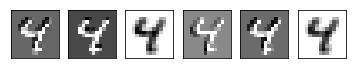

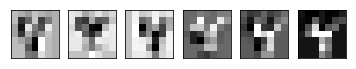

In [14]:
image1 = data.test.images[6]
plot_conv_layer(layer=layer_conv1, image=image1)
plot_conv_layer(layer=layer_conv2, image=image1)

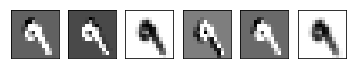

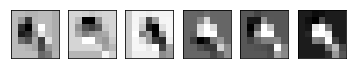

In [15]:
image2 = data.test.images[7]
plot_conv_layer(layer=layer_conv1, image=image2)
plot_conv_layer(layer=layer_conv2, image=image2)

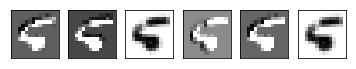

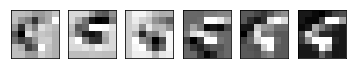

In [16]:
image3 = data.test.images[8]
plot_conv_layer(layer=layer_conv1, image=image3)
plot_conv_layer(layer=layer_conv2, image=image3)

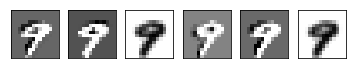

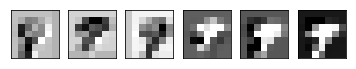

In [17]:
image4 = data.test.images[9]
plot_conv_layer(layer=layer_conv1, image=image4)
plot_conv_layer(layer=layer_conv2, image=image4)

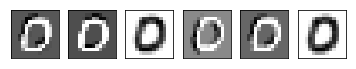

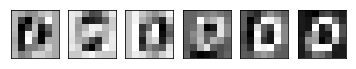

In [18]:
image5 = data.test.images[10]
plot_conv_layer(layer=layer_conv1, image=image5)
plot_conv_layer(layer=layer_conv2, image=image5)

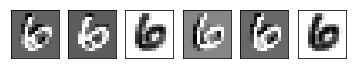

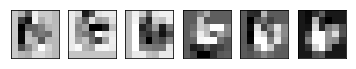

In [19]:
image6 = data.test.images[11]
plot_conv_layer(layer=layer_conv1, image=image6)
plot_conv_layer(layer=layer_conv2, image=image6)